In [1]:
# Importing libraries
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Polygon, mapping
from visualization_methods import *

# TODO: Modularizing code
# Make all methods that edit the map be decorators that take in
# Some ax (and maybe color) and return it after they've added their one thing

# Need to create a key / legend

# Make a parser for user input

# An implementation that can generate a legend adhoc could do something like the following:
# - Consolidate all data sets that are desired to be mapped
# - Place them into essentially a warehouse, stripping all but geometry and their parent table
# - Plot using gpd.plot(column = "[whatever we call original table]"
# - And then we can set various color schema based on that!

# Fucking fix the red line, perhaps

In [2]:
# Data cleaning methods
# clean_points - input geodataframe, removes any null point geometries
# If not, the pointplot gets angry
def clean_points(gdf):
    gdf = gdf[gdf.geometry.type == 'Point']
    return gdf

# clean_lineString - input geodataframe, converts LineString geometry to polygon
# This is because polyplot does not work on LineStrings!
# Please note that this actually fucking sucks
def clean_lineString(gdf):
    gdf['geometry'] = [Polygon(mapping(x)['coordinates']) for x in gdf.geometry]
    return gdf

<AxesSubplot:>

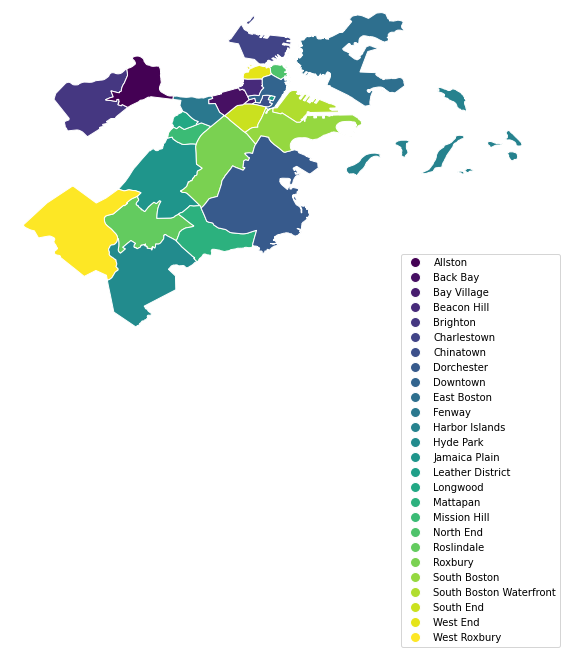

In [3]:
# Base map
boston = (-71.2, 42.2, -70.9, 42.4)
boston_neighborhoods = gpd.read_file('datasets/Boston_Neighborhoods.geojson')
gplt.choropleth(boston_neighborhoods, extent=boston, edgecolor='white', hue= 'Name', figsize=(10, 10),
                legend= True, legend_kwargs={'bbox_to_anchor': (1, 0.35)}, cmap= 'viridis')

TypeError: add_visualization() missing 1 required positional argument: 'legendLabel'

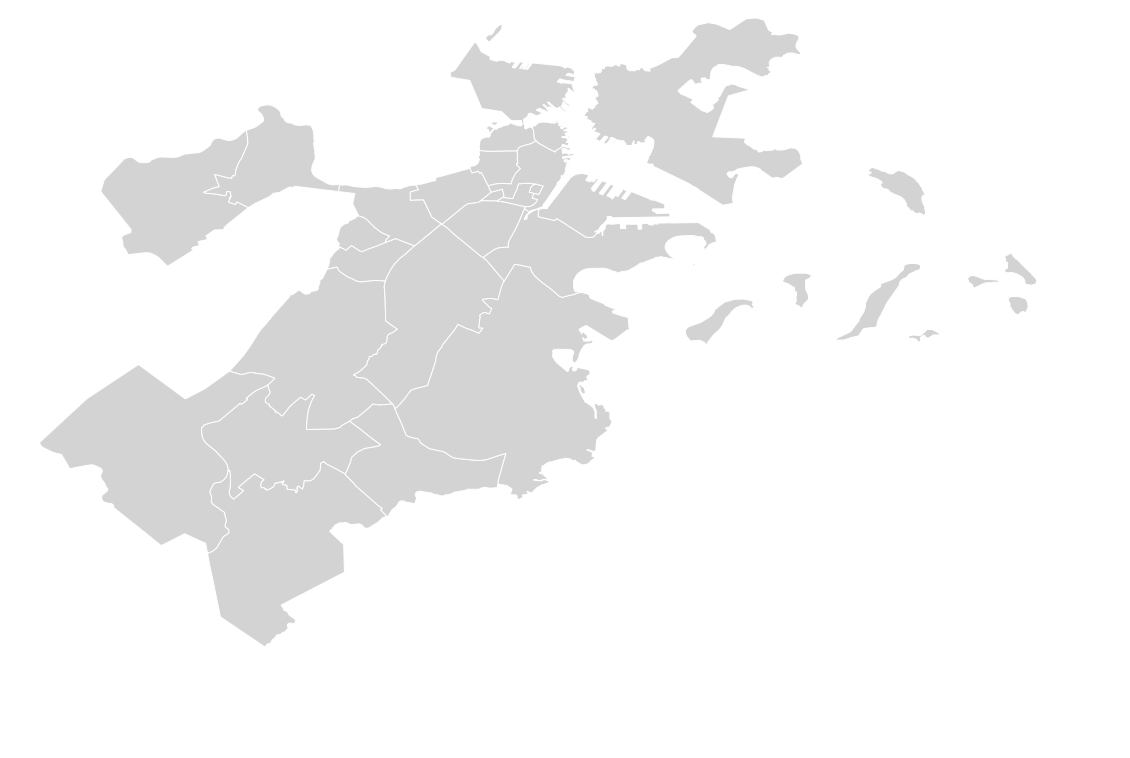

In [4]:
# Add polling locations [Point data type]
ax = init(20, 20, 'white', 'lightgray')
ax = add_polling_locations(ax, "cyan")

In [ ]:
# Adding subway routes [LineString data type]
# Note that geoplot cannot plot linestrings!
# to plot a linestring, you must use the geopandas.plot method
ax = init(20, 20, 'white', 'lightgray')
ax = add_polling_locations(ax, "cyan")
ax = add_subway(ax)
save_as(ax, "pollsAndSubways")

In [ ]:
# Show me open space!
ax = init(20, 20, 'white', 'lightgray')
ax = add_open_space(ax, "lightgreen")
ax = add_polling_locations(ax, "cyan")
ax = add_subway(ax)
fig = ax.get_figure()
fig.savefig("resultImages/openSpaceAndPollsAndSubways.png")

In [ ]:
# Show me trees?
ax = init(20, 20, 'white', 'lightgray')
ax = add_visualization(ax, "datasets/trees.geojson", "green")

In [ ]:
# Or trash collection days!
trash_days = gpd.read_file("datasets/Trash_Collection_Days.geojson")
ax = gplt.choropleth(trash_days, extent=boston, edgecolor='white', hue= 'TRASHDAY', figsize=(20, 20),
                legend= True, legend_kwargs={'bbox_to_anchor': (.7, 0.35)}, cmap= 'inferno')